In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from sklearn import linear_model
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime

In [2]:
coin_day = pd.read_csv('../files/BTC-USD.csv', parse_dates=['Date'])
coin_day.head()
coin_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1092 non-null   datetime64[ns]
 1   Open       1092 non-null   float64       
 2   High       1092 non-null   float64       
 3   Low        1092 non-null   float64       
 4   Close      1092 non-null   float64       
 5   Adj Close  1092 non-null   float64       
 6   Volume     1092 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 59.8 KB


Tính trung bình theo tuần

In [3]:
coin_day.reset_index()
week_size = int(len(coin_day) / 7)
coin_week = pd.DataFrame(columns=['Date', 'Open', 'High', 'Low', 'Close'])
for i in range(week_size):
    # print(i)
    sum_day = coin_day[['Open', 'High', 'Low', 'Close']].iloc[i*7: (i+1)*7].sum()/7
    sum_day['Date'] = coin_day['Date'].iloc[i*7 + 4]
    coin_week.loc[i] = sum_day
    # print(coin_week.iloc[i])

coin_week.head()
coin_week.index.name = 'week_20190520'
coin_week.to_csv('../files/coin_weeks_2019_2022.csv', index=False)

(array([ 1.,  4.,  8.,  6., 10., 14.,  7., 11.,  3.,  8.,  2.,  1.,  1.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  3.,  2.,  0.,  0.,  1.,
         5.,  1.,  3.,  2.,  1.,  2.,  3.,  1.,  3.,  1.,  1.,  4.,  0.,
         1.,  0.,  1.,  1.,  3.,  3.,  1.,  2.,  2.,  1.,  0.,  0.,  0.,
         1.,  3.,  0.,  0.,  1.,  2.,  0.,  2.,  1.,  1.,  3.,  0.,  0.,
         1.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([6000.034598285715, 6606.383381768573, 7212.732165251429,
        7819.080948734287, 8425.429732217144, 9031.7785157,
        9638.12729918286, 10244.476082665715, 10850.824866148572,
        11457.17364963143, 12063.522433114285, 12669.871216597145,
        13276.22000008, 13882.568783562858, 14488.917567045715,
        15095.266350528571, 15701.61513401143, 16307.963917494286,
        16914.312700977145, 17520.66148446, 1

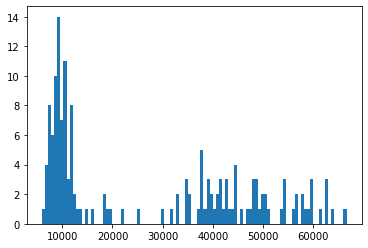

In [4]:
plt.hist(coin_week['High'], bins=100)

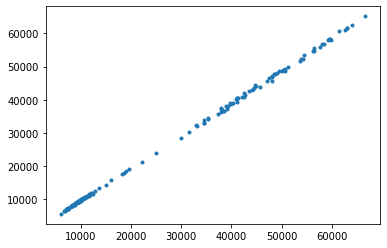

In [57]:
plt.plot(coin_week['High'], coin_week['Open'], '.')

Thử fit mô hình tuyến tính, nhận thấy có thể bỏ hệ số tự do

In [59]:
X = sm.add_constant(coin_week['Open'])
model_week_high_open = sm.OLS(coin_week['High'], X).fit()
print(model_week_high_open.params)
print(model_week_high_open.pvalues)

const   -16.733997
Open      1.026380
dtype: float64
const     7.150735e-01
Open     3.270093e-274
dtype: float64


In [60]:
model_week_high_open = sm.OLS(coin_week['High'], coin_week['Open']).fit()
print(model_week_high_open.params)
print(model_week_high_open.pvalues)

Open    1.025959
dtype: float64
Open    7.657841e-313
dtype: float64
